In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 29.7 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
pwd

'/home/jupyter-qgx6/beyond-phylogenies-team2'

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.4, palette='Set2')

In [68]:
variants_df = pd.read_csv('data/transformed_clades.csv',header=0)
variants_df['total_sequences'] = variants_df.iloc[:,[1,2,3]].sum(axis=1)
for col in list(variants_df):
    if col != 'week' and col != 'total_sequences':
        col_name = 'proportion_' + col
        variants_df[col_name] = variants_df[col] / variants_df['total_sequences']
variants_df.head(20)


,week,Omicron,recombinant,Delta,total_sequences,proportion_Omicron,proportion_recombinant,proportion_Delta
0,1,4029,2,78,4109,0.980531,0.000487,0.018983
1,2,2281,0,19,2300,0.991739,0.000000,0.008261
2,3,1821,0,13,1834,0.992912,0.000000,0.007088
3,4,919,0,8,927,0.991370,0.000000,0.008630
4,5,503,0,1,504,0.998016,0.000000,0.001984
5,6,282,0,1,283,0.996466,0.000000,0.003534
6,7,236,1,0,237,0.995781,0.004219,0.000000
7,8,195,0,0,195,1.000000,0.000000,0.000000
8,9,169,0,0,169,1.000000,0.000000,0.000000
9,10,110,0,0,110,1.000000,0.000000,0.000000


In [69]:
tests_df = pd.read_csv('data/percent_positivities.csv', header=0)
combined_df = variants_df.merge(tests_df, on = 'week', how = 'inner')
combined_df.head()


,week,Omicron,recombinant,Delta,total_sequences,proportion_Omicron,proportion_recombinant,proportion_Delta,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,rate(positive_test),rate(cumulative_positive_test)
0,1,4029,2,78,4109,0.980531,0.000487,0.018983,325501,9298939,89702,644683,0.275581,0.069329
1,2,2281,0,19,2300,0.991739,0.000000,0.008261,292907,9591846,79815,724498,0.272493,0.075533
2,3,1821,0,13,1834,0.992912,0.000000,0.007088,249248,9841094,64786,789284,0.259926,0.080203
3,4,919,0,8,927,0.991370,0.000000,0.008630,200912,10042006,41432,830716,0.206220,0.082724
4,5,503,0,1,504,0.998016,0.000000,0.001984,160913,10202919,22053,852769,0.137049,0.083581


In [48]:
# load in data frame that includes test positivity data over time + relative frequency of clades over time, binned by week
week = variants_df['week']
variants_dict = {}
for col in list(variants_df):
    if 'proportion' in col:
        variants_dict[col] = variants_df[col].tolist()

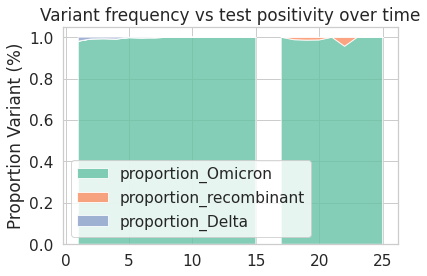

In [49]:
fig, ax = plt.subplots(figsize=(6,4))
## feed in binned dates (weekly) in place of 'year'
ax.stackplot(week, variants_dict.values(),
             labels=variants_dict.keys(), alpha=0.8)
ax.legend(loc='lower left')
ax.set_title('Variant frequency vs test positivity over time')
ax.set_ylabel('Proportion Variant (%)')

plt.show()

In [ ]:
## idea: use `baseline` to make it a stream graph wrt number of total tests per week?